In [37]:
import sys
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("IMPORTS OK")

IMPORTS OK


In [38]:
def get_data(ticker: str, interval: str = '1d', lookback_days: int = 756) -> pd.DataFrame:
    """
    Loads historical market data using yfinance.
    ticker (str): Stock or ETF symbol (e.g., 'SPY')
    interval (str): Data interval ('1d', '1h', '1m', etc.)
    lookback_days (int): Number of trading days to retrieve (capped at 7 if interval is one minute)

    Returns: pd.DataFrame: DataFrame downloaded from yfinance
    """
    if interval in ['1d', '1h']:
        period = str(lookback_days)+"d"
    elif interval == '1m':
        period = "7d"  
    else:
        raise ValueError("Unsupported interval for free data")
    df = yf.download(ticker, period=period, interval=interval, progress=False)
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = df.dropna()
    df = df.rename(columns=str.lower)
    df.index.name = 'datetime'

    return df

In [39]:
df = get_data("SPY","1d",756)
df['days_sequence'] = range(1, len(df) + 1)
df.info()
print(df.head())
print(df.describe())

/var/folders/sk/xk40gf9n2q3bhq2s90436ctr0000gn/T/ipykernel_7024/4255546963.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2022-08-19 to 2025-08-25
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          756 non-null    float64
 1   high           756 non-null    float64
 2   low            756 non-null    float64
 3   open           756 non-null    float64
 4   volume         756 non-null    int64  
 5   days_sequence  756 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 41.3 KB
                 close        high         low        open    volume  \
datetime                                                               
2022-08-19  404.588501  407.578775  403.706739  407.310417  68016900   
2022-08-22  396.163940  399.882624  395.253427  399.710086  77695600   
2022-08-23  395.205505  398.147869  394.649604  395.732626  49105200   
2022-08-24  396.470642  397.850744  394.285440  394.975476  49177800   
2022-08-25  402.067902  402.115811  396.87

In [40]:
X = df[['open', 'days_sequence']]
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MARK DOWN ASSUMPTION: Linear relation")
print("Test R² score:" + str(r2))
print("Test Mean Squared Error:" + str(mse))


MARK DOWN ASSUMPTION: Linear relation
Test R² score:0.9609113158245219
Test Mean Squared Error:44.794131606522825


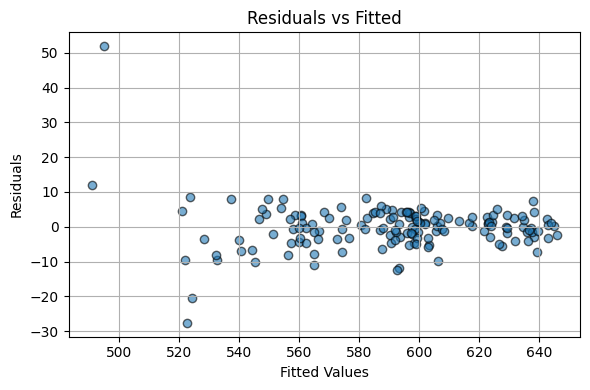

In [41]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()